In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Logistic Regression

In a logistic regression,
we want to predict a binary output variable $y$ which has 0 or 1 values
based on an input vector $x$ of size $n$.

The coefficients $\theta$ of the models are learned from a set on
$m$ training samples.

$$x \in \mathbb{R}^n: \quad\textrm{input vector of features}$$

$$X \;(m \times n) \in \mathbb{R}^{m \times n}: \quad\textrm{all 
input samples}$$

$$z = \theta^T x \quad\in \mathbb{R} \quad [-\infty..\infty]$$

$$Z = X \cdot \theta \quad\in \mathbb{R}^m$$

$$h_\theta(x) = g(z) = a  \quad\in [0..1]$$

$$1 - a \quad \in [0..1]$$

$$-\log a: [0..1] :\rightarrow [0..\infty]$$



## Hypotesis representation
Specifically, we want to predict the probability of a samples to yield
0 or 1 output.

The features are usually real numbers, so we need a link between real
numbers to a `[0..1]` range expressing the probability of the output.
In logistic regression this link is provided by the **logistic function**:

$$\textrm{logistic function:}\quad g(z) = \frac{1}{1 + e^{-z}}$$

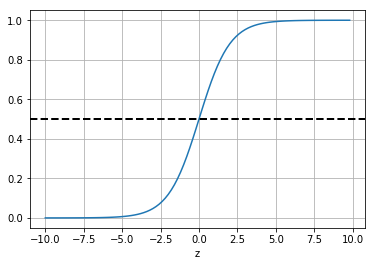

In [418]:
z = np.arange(-10, 10, 0.2)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
plt.plot(z, sigmoid(z))
plt.grid()
plt.axhline(0.5, lw=2, color='k', ls='--')
plt.xlabel('z');

In this context, the hypothesis is:

$$h_\theta(x) = g(\theta^T x)$$

representing the probability that, with a given parameter vector $\theta$,
a sample $x$ yields $y = 1$. In equations:

$$P(y = 1|\theta, x) = h_\theta(x) = g(\theta^T x)$$

Equivalent expressions:

$$P(y = 1|\theta, x) = \frac{e^{\theta^T x}}{1 + e^{\theta^T x}}$$
$$P(y = 0|\theta, x) = \frac{1}{1 + e^{\theta^T x}}$$

The ratio is called *odds*, and taking the log we obtain the *log-odds*:

$$\log \frac{P(y = 1|\theta, x)}{P(y = 0|\theta, x)} = \theta^T x$$

The previous function is the inverse of the logistic function is called the **logit function** (or *log of odds* function):

$$\textrm{logit function:}\quad g^{-1}(z) = \log{\frac{p}{1-p}}$$

## Decision boundary

To convert probability to a discrete output (0 or 1) we need to set a threshold. Typically we predict:

$$ y = 1\quad \textrm{if} \quad h_\theta(x) \ge 0.5 $$

$$ y = 0\quad \textrm{if} \quad h_\theta(x) < 0.5 $$

The locus of points in the **sample space** where $h_\theta(x) = 0.5$ is the **decision boundary** for a given "optimal $\theta$". Given the shape of $g(z)$, the decision boundary is given by the $x$ satisfying the equation:

$$\theta^T x = 0$$

So, with $n$ features, the decision boundary is an hyper-plane of dimension $n-1$.

Like for polynomial regression, we can add features
by adding powers of pre-existing features. For example with 1 feature,
and adding the 2-power, the decision boundary becomes:

$$\theta_0 + \theta_1 x_1 + \theta_2 x_1^2 =0$$

Here, the decision boundary is a range instead of a point.
With 2 features, adding powers of 2 we obtain:

$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2  =0$$

which is the equation of an ellipsis. In general, adding higher powers and
cross-products we can obtain complex surfaces as decision boundaries.
However, the problem to keep in mind is that often, adding polynomial features leads to overfitting.



## Cost function

In the previous sections we specified a model able 
to predict probabilities ($h_\theta(x)$) 
and to assign classes (via decision boundary).
Now we tackle the problem on finding the "optimal" $\theta$
given a training set $X$.

We need to define a cost function $J(\theta)$ to be minimized.

$$J(\theta) = \frac{1}{m} 
\sum_{i=1}^m \textrm{Cost}(h_\theta(x^{(i)}), y^{(i)})$$

In logistic regression, remembering that $y$ is either 0 or 1 
and $h_\theta(x)$ has values in $[0..1]$, we define:

\begin{align}
\textrm{Cost}(h_\theta(x), y) = &- y \; \log h_\theta(x) \\
                                &- (1 - y) \; \log (1 - h_\theta(x))
\end{align}

In principle, we could also think of choosing the squared error as cost function:

\begin{align}
\textrm{Cost}(h_\theta(x), y) = \frac{1}{2}(h_\theta(x) - y)^2
\end{align}

but minimizing the former definition corresponds to using the maximum likelihood
for a Bernoulli distribution. The comparison of the two cost functions is reported below:


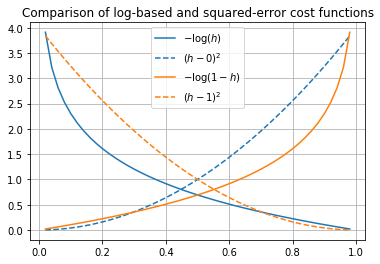

In [435]:
scale = 4
h = np.arange(0.02, 1, 0.02)
plt.plot(h, -np.log(h), label=r'$-\log(h)$')
plt.plot(h, scale * h**2, label=r'$(h - 0)^2$', color='C0', ls='--')
plt.plot(h, -np.log(1 - h), label=r'$-\log(1 - h)$')
plt.plot(h, scale * (1 - h)**2, label=r'$(h - 1)^2$', color='C1', ls='--')
plt.legend();
plt.grid()
plt.title('Comparison of log-based and squared-error cost functions');

Intuitively, minimizing this function "works", because that it penalizes
$\theta$ which yield $h_\theta(x)$ far from the true class.

### Note on cost functions
>From the comparison we see that the quadratic cost has zero derivative when $h$ 
>approaches the correct value of 0 or 1. Also the cost is finite even for the wrong value
>(h =0 when y = 1, h=1 when y=0). Instead, the log-based has derivative of 1 close to
>the correct value and diverges to $\infty$ when the value approaches the wrong one.
>Intuitively, these two properties makes the log-based cost being able to better rank
>$h$ values close to the correct one, and to heavily penalize "very wrong" values of $h$.
>In addition, theory shows that the log-based cost function yields maximum likelihood estimation
>of a Bernoulli random variable.


### Cost function expressions
Rewriting $J(\theta)$ we obtain:

\begin{align}
J(\theta) 
    &= -\frac{1}{m} \sum_{i=1}^m 
    \left[y^{(i)} \; \log h_\theta(x^{(i)}) + (1 - y^{(i)}) \; \log (1 - h_\theta(x^{(i)}))\right] \\
    &= -\frac{1}{m} \sum_{i=1}^m 
    \left[y^{(i)} \theta^T x^{(i)} - \log(\exp(\theta^T x^{(i)}) + 1)
    \right] \\  
\end{align}

In vectorized form:

$$h_\theta(X) = g(X\,\theta)$$

\begin{align}
J(\theta) 
&=  - \frac{1}{m} \left[ y^T \log g(X\,\theta) 
    + (1 - y^T) \log (1 - g(X\,\theta)) \right] \\
&=  - \frac{1}{m} \left[ y^T \, X \, \theta + \log (\exp(X \, \theta) + 1) \right]
\end{align}

### Notes:

- The cost function in logistic regression is convex: http://mathgotchas.blogspot.com/2011/10/why-is-error-function-minimized-in.html

### Passages

$$ y \, \log g(X\theta) = y \, X\theta - y \, \log(\exp(X\theta) + 1)$$

$$(1 - y) \, \log (1 - g(X\theta)) = - (1 - y) \, \log(\exp(X\theta) + 1)$$

## Gradient Descent: update formula

As for linear regression, in gradient descent, at each iteration, we update $\theta$ according to:

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$$

for all $j$ at the same time. We repeat until we converge or we reach
the max allowed iterations.

Computing the partial derivative of $J(\theta)$ (passages not shown),
we obtain the same formal expression as for linear regression:

$$ \frac{\partial}{\partial \theta_j} J(\theta) = 
\frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right)\, x_j^{(i)}$$

With substitutions for logistic regression, we obtain:

\begin{align}
\frac{\partial}{\partial \theta_j} J(\theta) 
&= \frac{1}{m} \sum_{i=1}^m \left( g(\theta^T x^{(i)}) - y^{(i)} \right)\, x_j^{(i)} \\
\nabla J(\theta) &= \frac{1}{m} X^T \left( g(X\theta) - y \right)
\end{align}

So, the vectorial update formula becomes:

$$\theta := \theta - \frac{\alpha}{m} X^T \left( g(X\theta) - y \right)$$



## logistic and logit

The inverse of the logistic function is the **logit function** (or *log of odds* function):

$$\textrm{logit function:}\quad g^{-1}(z) = \log{\frac{p}{1-p}}$$


## Regularization

Regularization is a modification to the cost function that helps fighting overfitting.
In particular we penalize high values of parameters, introducing a "shrinkage"
term which makes parameters close to the origin preferable.

### Ridge regularization

The regularized cost function is:

$$J_r(\theta) = J(\theta) + \frac{\lambda}{2 m} \, \|\theta\|^2 
\quad \textrm{the norm excludes }\theta_0$$

The regularized gradient descent step is:

$$\theta_j := \theta_j - \alpha \left[ \frac{\partial}{\partial \theta_j} J(\theta) 
+ \frac{\lambda}{m} \theta_j\right]
= \theta_j\left(1 - \alpha \frac{\lambda}{m} \right) - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$$

for $j = [1..n]$ (the update formula for $\theta_0$ remains unmmodified).

# Load Data

Load data in a nicely formatted DataFrame:

In [2]:
df = (pd.read_csv('machine-learning-ex2/ex2/ex2data1.txt', header=None)
      .rename(columns={0: 'exam1', 1: 'exam2', 2: 'admitted'})
      .rename_axis('sample', axis='index')
      .rename_axis('feature', axis='columns')
      .assign(admitted=lambda x: x.admitted.astype(bool))
     )
df_orig = df.copy()
df.head()

feature,exam1,exam2,admitted
sample,,,
0,34.623660,78.024693,False
1,30.286711,43.894998,False
2,35.847409,72.902198,False
3,60.182599,86.308552,True
4,79.032736,75.344376,True


In [3]:
df.dtypes

feature
exam1       float64
exam2       float64
admitted       bool
dtype: object

# Explore data

First step is always explore the data. This step is missing from Andrw Ng class,
most probably for time constraints. Student simply trust him that the provided
data can be reasonably fitted with linear regression.

But let's take a look. In python seaborn comes to the rescue, but first we need
tidy data:

In [4]:
df_tidy = df.melt(id_vars='admitted')
df_tidy.sample(5)

,admitted,feature,value
7,True,exam1,75.024746
173,True,exam2,73.094998
84,True,exam1,80.366756
11,False,exam1,75.013658
93,True,exam1,74.492692


## Features vs target

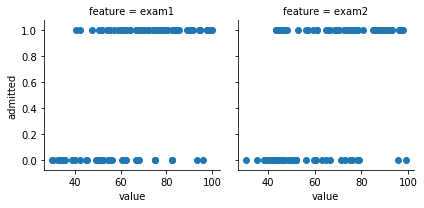

In [5]:
g = sns.FacetGrid(df_tidy, col="feature", sharex=False)
g.map(plt.scatter, "value", "admitted");

## Pairplot of all features and output variable

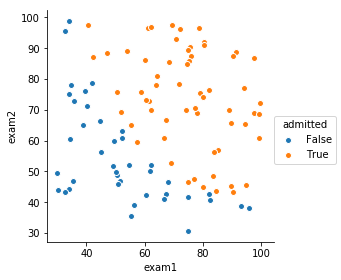

In [6]:
sns.pairplot(df, hue='admitted', x_vars=['exam1'], y_vars=['exam2'], size=4);

# Data for logistic regression

It is nice to have DataFrames, but for the underlying number crunching we use numpy.
Here we get the variables we need for linear regression as numpy arrays:

In [7]:
X = df[['exam1', 'exam2']].values  # features for each sample
y = df['admitted'].values          # target to be predicted
n = X.shape[1]                     # number of features
n

2

In [8]:
X.shape

(100, 2)

# Add 0-order feature

The predicted variable is a linear combination of the input features.
It is useful to a constant to the linear combination. 
A numerical trick to do that is
adding an additional "feature" with constant value of 1 across all samples.

In [9]:
X0 = np.hstack([np.ones((X.shape[0], 1)), X])
X0[:5]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

# Functions for Gradient Descent

In [10]:
np.hstack([0,  np.ones(3)])

array([0., 1., 1., 1.])

In [86]:
def _sanitize(X, y, θ):
    θ = np.squeeze(np.asfarray(θ))
    y = np.squeeze(y)
    X = np.atleast_2d(X)
    msg = (f'Incompatible shapes:\n'
           f'X.shape = {X.shape} should be equal to '
           f'(len(y), len(θ)) = {(len(y), len(θ))}')
    assert X.shape == (len(y), len(θ)), msg
    return X, y, θ


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def hypotesis_linear(X, θ):
    return X @ θ


def hypotesis_logistic(X, θ):
    return sigmoid(X @ θ)


def computeCostLogistic(X, y, θ, return_gradient=False):
    """
    Compute the cost function for logistic regression.
    
    Arguments:
        X (2D array): array of training sample, one row per sample, one 
            column per feature.
        y (1D array): target variable, same size as the rows in X.
        θ (1D array): model parameters used to compute the cost function
    
    Returns:
        J (float): the cost function computed at θ.
        Grad (1D array): gradient of the cost function, same size as θ.
    """
    X, y, θ = _sanitize(X, y, θ)
    m = len(y)  # number of training samples
    #hθ = sigmoid(X @ θ)
    #J = - (1 / m) * (y @ np.log(hθ) + (1 - y) @ (np.log(1 - hθ)))
    Xθ = X @ θ
    J = - (1 / m) * (y @ Xθ - np.log(np.exp(Xθ) + 1).sum())
    if return_gradient:
        hθ = sigmoid(Xθ)
        Grad = (1 / m) * (hθ - y) @ X
        return J, Grad
    else:
        return J


def gradientDescent(X, y, θ, α, num_iters, h, cost_func, λ_reg=0):
    """
    Perform Gradient descent to learn θ
    
    Arguments:
        X (2D array): array of training sample, one row per sample, one 
            column per feature.
        y (1D array): target variable, same size as the rows in X.
        θ (1D array): initial parameters, same size as the columns in X.
        num_iter (int): number of iterations for Gradient Descent
        h (function): hypotesys funtion taking (X, θ) as inputs and returning
            predictions. X can be 1D same size as θ, or 2D with the number
            of columns equal to len(θ).
        λ_reg (float): regularization factor. If 0 (default) no regularization
            is applied. If > 0, apply Ridge regularization. 
            λ_reg * α / m is subtracted from θ[1:] at each update step.
            Th
    Returns:
        A tuple:
        - θ (1D array): the learned/fitted parameters
        - J_history (1D array): the value of the cost function at each iteration
    """
    X, y, θ = _sanitize(X, y, θ)
    
    m = len(y)  # number of training samples
    J_history = np.zeros(num_iters)
    θ_history = np.zeros((num_iters, len(θ)))
    reg_factor = np.hstack([0, (λ_reg * α / m) * np.ones(θ.size - 1)])
    for i in range(num_iters):
        h_θ = h(X, θ)  
        θ = (θ - reg_factor) - (α / m) * ((h_θ - y) @ X)      
        
        # Save the cost J in every iteration    
        J_history[i] = cost_func(X, y, θ)
        θ_history[i] = θ

    return θ, J_history, θ_history

# Compute cost

In [157]:
θ_init = np.zeros(3)
J, grad = computeCostLogistic(X0, y, θ_init, return_gradient=True)

The cost function with zero initial θ should be 0.693:

In [158]:
J

0.6931471805599453

The gradient is:

In [159]:
grad

array([ -0.1       , -12.00921659, -11.26284221])

# Learn θ

## Scipy

In [271]:
import scipy.optimize as so

In [272]:
def _cost(θ, X, y):
    return computeCostLogistic(X, y, θ, return_gradient=True)

In [273]:
θ_history = []
def callback(θ):
    global θ_history
    θ_history.append(θ)

In [274]:
res = so.minimize(_cost, θ_init, args=(X0, y), method='BFGS', jac=True, callback=callback)
res

      fun: 0.20349770158960495
 hess_inv: array([[ 3.16964331e+03, -2.53890018e+01, -2.57875963e+01],
       [-2.53890018e+01,  2.18592216e-01,  1.92987767e-01],
       [-2.57875963e+01,  1.92987767e-01,  2.25387529e-01]])
      jac: array([-1.27536482e-07, -7.12666441e-06, -8.21058923e-06])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 26
     njev: 30
   status: 0
  success: True
        x: array([-25.16134734,   0.20623183,   0.20147168])

In [275]:
θ = res['x']
θ

array([-25.16134734,   0.20623183,   0.20147168])

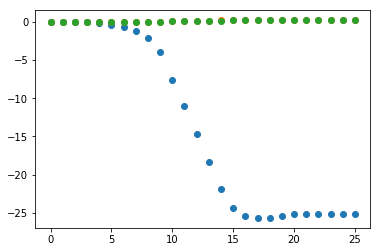

In [276]:
θ_history = np.asanyarray(θ_history)
plt.plot(θ_history, 'o');

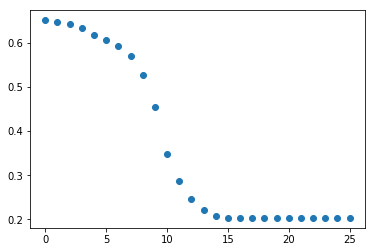

In [277]:
J_history = [computeCostLogistic(X0, y, θi, return_gradient=False)
             for θi in θ_history]
plt.plot(J_history, 'o');

## Lmfit

In [23]:
import lmfit

In [24]:
params = lmfit.Parameters()
params.add('intercept', 0)
params.add('t_exam1', 0)
params.add('t_exam2', 0)

In [25]:
def _cost_lm(params, X, y):
    θ = np.array([v for v in params.valuesdict().values()])
    return computeCostLogistic(X, y, θ, return_gradient=True)

In [28]:
# res_lm = lmfit.minimize(_cost_lm, params, args=(X0, y), method='BFGS', jac=True)
# res_lm

## Scikit-learn

Scikit-learn only provides 
[regularized logistic regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
For this exercise, we make it un-regularized by setting 
`C` to an high value ($C^{-1} = \lambda$ the regularization strength).

`LogisticRegression` can also fit the intercept without the need of adding
the 1-column dummy feature.

In [376]:
from sklearn.linear_model import LogisticRegression

In [377]:
model = LogisticRegression(C=1e6, solver='lbfgs')
model.fit(X, y)

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [378]:
model.coef_, model.intercept_

(array([[0.20623222, 0.2014719 ]]), array([-25.16138556]))

We can pass also pass the trainig set with intercept (`X0`) and use  `fit_intercept=False` instead:

In [379]:
model0 = LogisticRegression(C=1e6, solver='lbfgs', fit_intercept=False)
model0.fit(X0, y)

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [380]:
model0.coef_, model0.intercept_

(array([[-25.16053959,   0.20622546,   0.20146506]]), array([0.]))

In [381]:
x = np.array([45, 85])
x0 = np.hstack([1, x])

In [384]:
p_admitted = model.predict_proba(x[np.newaxis, :])[0][1]
print(f'Student with exams scores: {tuple(x)} \n'
      f'Admission probability predicted by the model: {p_admitted:.4f}')

Student with exams scores: (45, 85) 
Admission probability predicted by the model: 0.7763


In [385]:
p_admitted = model0.predict_proba(x0[np.newaxis, :])[0][1]
print(f'Student with exams scores: {tuple(x0[1:])} \n'
      f'Admission probability predicted by the model: {p_admitted:.4f}')

Student with exams scores: (45, 85) 
Admission probability predicted by the model: 0.7763


> Solution: probability should be 0.776

In [396]:
XX1, XX2 = np.meshgrid(np.arange(20, 100, 0.5), np.arange(20, 100, 0.5))

In [397]:
XX = np.vstack([XX1.ravel(), XX2.ravel()]).T
XX.shape

(25600, 2)

In [398]:
YY = model.predict(XX).reshape(XX1.shape)

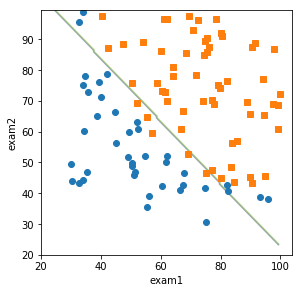

In [408]:
plt.figure(figsize=(4.5, 4.5))
plt.contour(XX1, XX2, YY, alpha=0.2)
plt.plot(X[~y, 0], X[~y, 1], 'o')
plt.plot(X[y, 0], X[y, 1], 's')
plt.xlabel('exam1'); plt.ylabel('exam2');

# Run Gradient Descent

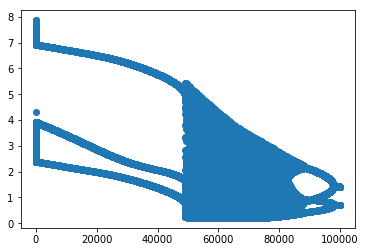

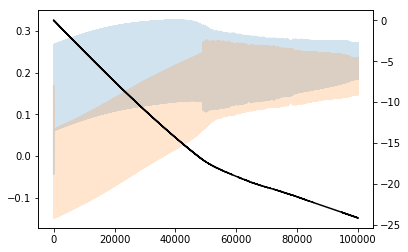

In [259]:
α = 0.005
num_iters = 100000
λ_reg = 1

θ = [0, 0, 0]
θ, J_history, θ_history = gradientDescent(X0, y, θ, α, num_iters, λ_reg=λ_reg,
                                          h=hypotesis_logistic,
                                          cost_func=computeCostLogistic);
plt.plot(J_history, 'o');
plt.figure()
plt.plot(θ_history[:, 1], alpha=0.2)
plt.plot(θ_history[:, 2], alpha=0.2)
plt.twinx()
plt.plot(θ_history[:, 0], '-k')

In [254]:
im = np.where(J_history == J_history.min())
θ_min = θ_history[im]
θ_min, im

(array([[-20.61351842,   0.17134772,   0.16269507]]), (array([71799]),))

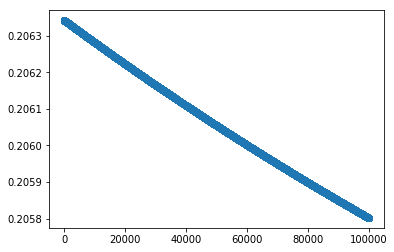

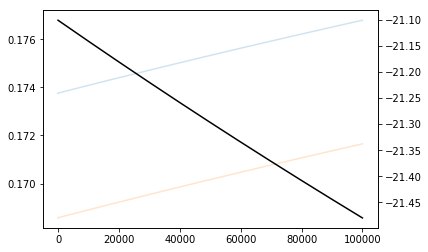

In [260]:
α = 0.003
num_iters = 100000
λ_reg = 1

θ = θ_min
θ, J_history, θ_history = gradientDescent(X0, y, θ, α, num_iters, λ_reg=λ_reg,
                                          h=hypotesis_logistic,
                                          cost_func=computeCostLogistic);
plt.plot(J_history, 'o');
plt.figure()
plt.plot(θ_history[:, 1], alpha=0.2)
plt.plot(θ_history[:, 2], alpha=0.2)
plt.twinx()
plt.plot(θ_history[:, 0], '-k')

In [261]:
im = np.where(J_history == J_history.min())
θ_min = θ_history[im]
θ_min, im

(array([[-21.4797976 ,   0.17678851,   0.17165105]]), (array([99999]),))

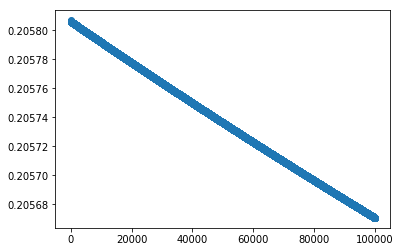

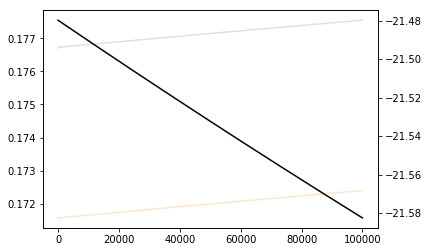

In [266]:
α = 0.002
num_iters = 100000
λ_reg = 5

θ = θ_min
θ, J_history, θ_history = gradientDescent(X0, y, θ, α, num_iters, λ_reg=λ_reg,
                                          h=hypotesis_logistic,
                                          cost_func=computeCostLogistic);
plt.plot(J_history, 'o');
plt.figure()
plt.plot(θ_history[:, 1], alpha=0.2)
plt.plot(θ_history[:, 2], alpha=0.2)
plt.twinx()
plt.plot(θ_history[:, 0], '-k')

In [267]:
J_history

array([0.20580688, 0.20580594, 0.20580604, ..., 0.20567068, 0.20567068,
       0.20567068])

# Predict

In [31]:
x = np.array([45, 85])
x = np.hstack([1, x])

In [32]:
p_admitted = sigmoid(x @ θ)
print(f'Student with exams scores: {tuple(x[1:])} \n'
      f'Admission probability predicted by the model: {p_admitted:.3f}')

Student with exams scores: (45, 85) 
Admission probability predicted by the model: 0.776


> Solution: probability should be 0.776

# Visualize results

We start putting the prediction and error for all the samples in the training set in the DataFrame with all the data:

In [97]:
df = df_orig.copy()

In [98]:
df['p_admitted_pred'] = hypotesis_logistic(X0, θ)
df['admitted_pred'] = df.p_admitted_pred > 0.5
df['error'] = df.admitted.astype(int) - df.admitted_pred.astype(int)

df_tidy = (df
           .melt(id_vars=['admitted', 'admitted_pred', 'p_admitted_pred', 'error'])
           .sort_values(by='value')
          )
df_tidy.sample(5)

,admitted,admitted_pred,p_admitted_pred,error,feature,value
162,False,False,0.003505,0,exam2,39.261473
149,True,True,0.999991,0,exam2,88.696293
102,False,False,0.043909,0,exam2,72.902198
44,False,False,0.004489,0,exam1,51.047752
104,True,True,0.998199,0,exam2,75.344376


## Error

Error is the different between model and experimental outputs:

(-0.01, 0.33318178373089513)

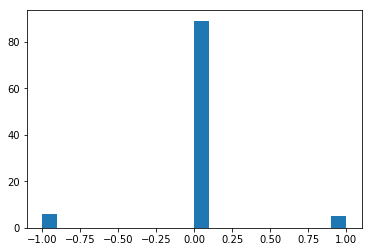

In [99]:
plt.hist(df.error, bins=20)
df.error.mean(), df.error.std()

In [100]:
def binary_prediction_metrics(y, y_pred):
    y = np.asanyarray(y).astype(bool)
    y_pred = np.asanyarray(y_pred).astype(bool)
    TP = ( y_pred *  y).sum()
    TN = (~y_pred * ~y).sum()
    FP = ( y_pred * ~y).sum()
    FN = (~y_pred *  y).sum()
    P = y.sum()
    N = (~y).sum()
    assert TP + FN == P
    assert TN + FP == N
    return {'precision': TP / (TP + FP),
            'accuracy': (TP + TN) / len(y),
            'sensitivity': TP / P,
            'specificity': TN / N,
            'miss_rate': FN / P,
            'fall_out': FP / N}

In [101]:
binary_prediction_metrics(df.admitted, df.admitted_pred)

{'precision': 0.9016393442622951,
 'accuracy': 0.89,
 'sensitivity': 0.9166666666666666,
 'specificity': 0.85,
 'miss_rate': 0.08333333333333333,
 'fall_out': 0.15}

If the model has low bias the error mean is close to 0.
The error variance will tell us the precision with which we can
estimate the output.

## Features vs output

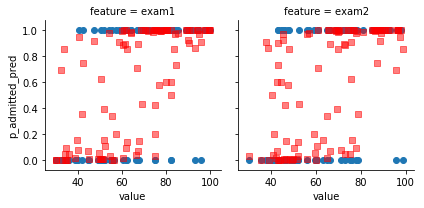

In [102]:
g = sns.FacetGrid(df_tidy, col="feature", sharex=False)
g.map(plt.scatter, "value", "admitted");
g.map(plt.scatter, "value", "p_admitted_pred", color='r', marker='s', alpha=0.5);

## Visualize model in 3D

In [167]:
x1 = np.arange(20, 100)
x2 = np.arange(20, 100)

# Unnormalized grid (for visualization)
X1, X2 = np.meshgrid(x1, x2)

# Normalized grid (for evaluation)
X_grid = np.vstack([np.ones(X1.size), 
                    X1.ravel(), 
                    X2.ravel()]).T
X_grid.shape

(6400, 3)

In [168]:
y_pred_grid = hypotesis_logistic(X_grid, θ).reshape(X1.shape)

In [169]:
from mpl_toolkits.mplot3d import Axes3D

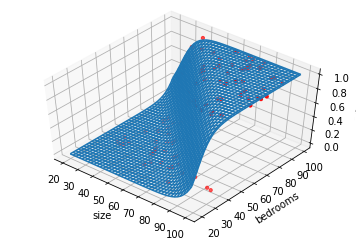

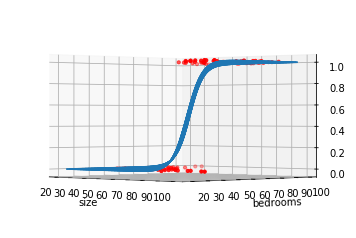

In [170]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', elev=50, azim=-50)

ax.plot_wireframe(X1, X2, y_pred_grid)

ax.scatter(X[:, 0], X[:, 1], y, color='r', s=10)

ax.set_ylabel('bedrooms')
ax.set_xlabel('size')
ax.set_zlabel('price');
display(fig)
ax.view_init(elev=0, azim=-45)

## Visualize the cost function in 3D

The model prediction is `X @ θ`, where `X` is the normalized training set:

In [179]:
X0.shape

(100, 3)

Instead of a single-point `θ`, we user an array `TT` of points covering 
a rectangualr grid in the parameter space:

In [180]:
θ

array([-25.16134734,   0.20623183,   0.20147168])

In [207]:
θ1 = np.arange(-3, 3, 0.05)
θ2 = np.arange(-3, 3, 0.05)
T1, T2 = np.meshgrid(θ1, θ2)

In [208]:
TT = np.vstack([np.ones(T1.size)*θ[0], T1.ravel(), T2.ravel()])
TT.shape

(3, 14400)

Next, the error for each traning vector and each parameter vector is:

In [209]:
Xθ = X0 @ TT
JJ = - (1 / m) * (y @ Xθ - np.log(np.exp(Xθ) + 1).sum(0))
JJ.shape

(14400,)

With this we can plot both the cost function "surface"
and the trajectory that gradient descent took to reach
minimum.

In [210]:
θ_history.shape

(26, 3)

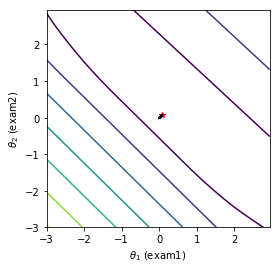

In [232]:
plt.figure(figsize=(4, 4))
plt.contour(θ1, θ2, JJ.reshape(T1.shape))
plt.plot(θ[1], θ[2], 'r*')
plt.plot(θ_history[:, 1], θ_history[:, 2], 'k');
plt.xlabel(r'$\theta_1$ (exam1)'); plt.ylabel(r'$\theta_2$ (exam2)');

For the fun of it, we can also show the surface in 3D.
It makes a pretty plot even though I don't think it 
adds much in terms of understanding:

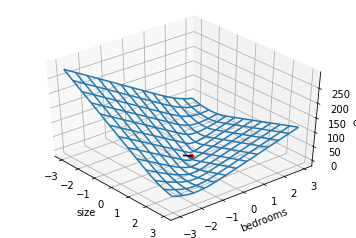

In [212]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', elev=40, azim=-40)

ax.plot_wireframe(T1, T2, JJ.reshape(T1.shape),
                 cstride=10, rstride=10,
                 #edgecolor='none', linewidth=0,
                 cmap=plt.cm.viridis)

ax.scatter(θ[1], θ[2], color='r', s=20, zorder=10)
ax.plot(θ_history[:, 1], θ_history[:, 2], 'k');
ax.set_ylabel('bedrooms')
ax.set_xlabel('size')
ax.set_zlabel('cost');